# Project: Levels of Football

Kaleb Sailer

This is the visualization file for all three levels of football.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# reading in dataframes 
hs_cfb_df = pd.read_csv('hs_cfb_df.csv', encoding='utf-8')
cfb_nfl_df = pd.read_csv('cfb_nfl_df.csv', encoding='utf-8')
hs_nfl_df = pd.read_csv('hs_nfl_df.csv', encoding='utf-8')
all_fb_df = pd.read_csv('all_fb.csv', encoding='utf-8')

### Question 1: How do average (scoring margins, ppg, ypg, etc.) differ between each level of football?

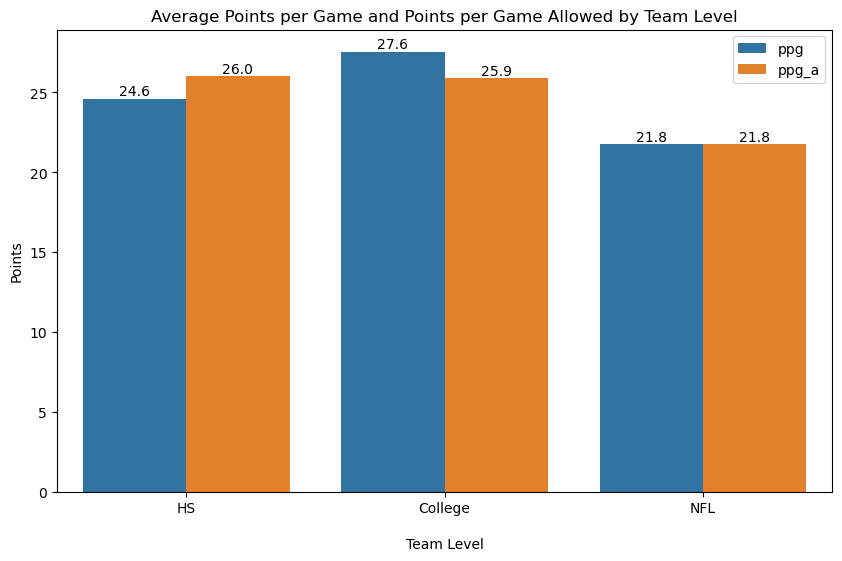

In [5]:
# grouping by level 
level_ppg = all_fb_df.groupby('team_level')['ppg'].mean()
level_ppga = all_fb_df.groupby('team_level')['ppg_a'].mean()

ppg_df = pd.DataFrame({
    'team_level': level_ppg.index,
    'ppg': level_ppg.values,
    'ppg_a': level_ppga.values
})

melted_ppg_df = ppg_df.melt(id_vars='team_level', var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
plt.title('Average Points per Game and Points per Game Allowed by Team Level')
plt.xlabel('\nTeam Level')
plt.ylabel('Points')

ax = sns.barplot(data=melted_ppg_df, x='team_level', y='Value', hue='Metric', order=['HS', 'College', 'NFL'])
plt.legend()

# each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

plt.savefig("ppg_by_level.png", dpi=300)
plt.show()

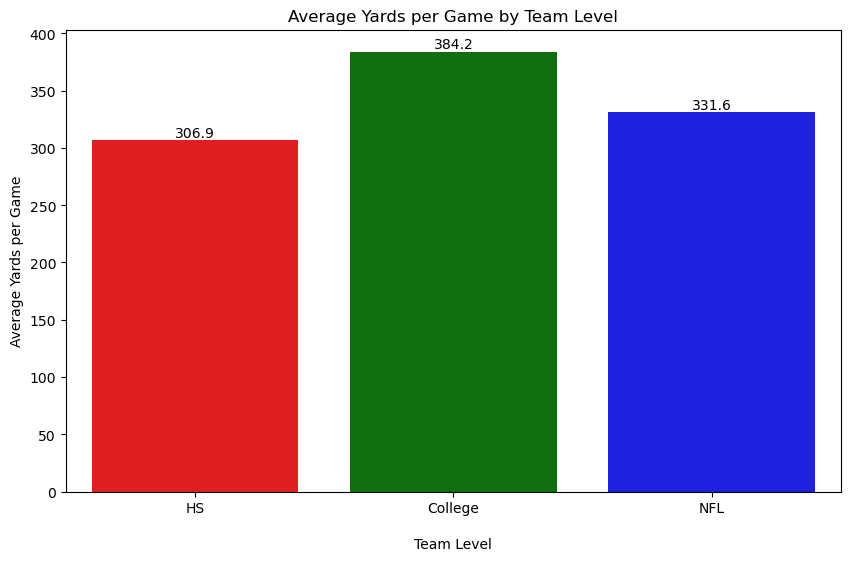

In [6]:
level_ypg = all_fb_df.groupby('team_level')['ypg'].mean() 

level_ypg = level_ypg.reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=level_ypg, x='team_level', y='ypg', order=['HS', 'College', 'NFL'], hue='team_level', palette=['green', 'red', 'blue'])

# each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

    
plt.title('Average Yards per Game by Team Level')
plt.xlabel('\nTeam Level')
plt.ylabel('Average Yards per Game')

plt.savefig("ypg_by_level.png", dpi=300)
plt.show()

### Question 2: Win % (Geographic, Conference, etc.)

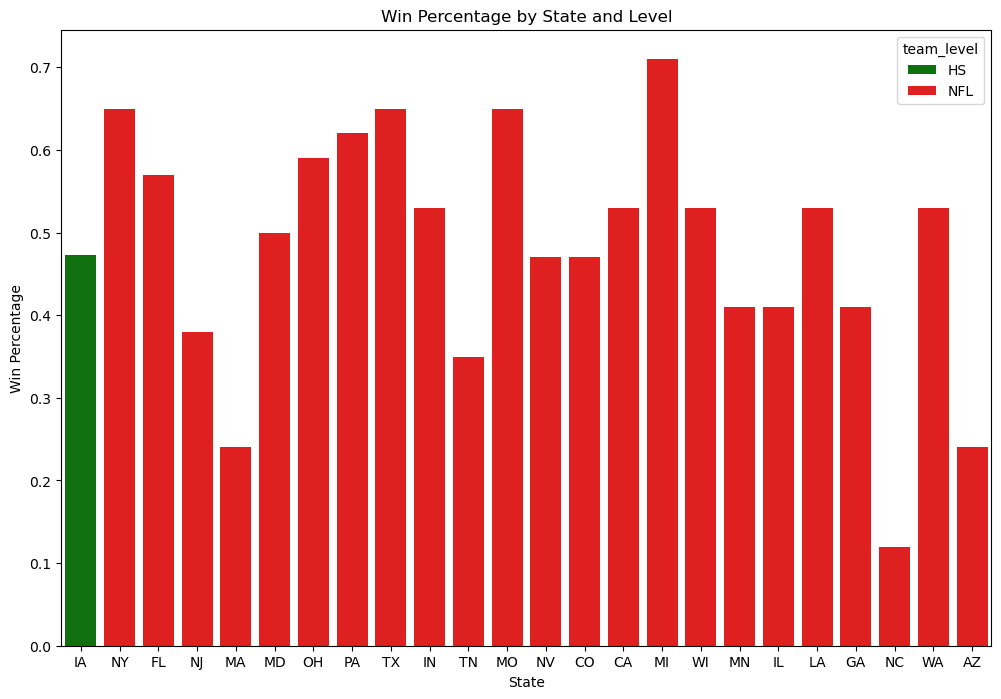

In [8]:
# geographic grouping
plt.figure(figsize=(12, 8))
plt.title('Win Percentage by State and Level')
plt.xlabel('State')
plt.ylabel('Win Percentage')

sns.barplot(x='state', y='win_pct', data=hs_nfl_df, hue='team_level', palette={'NFL': 'red', 'HS': 'green'}, errorbar=None)

plt.savefig("win_pct_state.png", dpi=300)
plt.show()

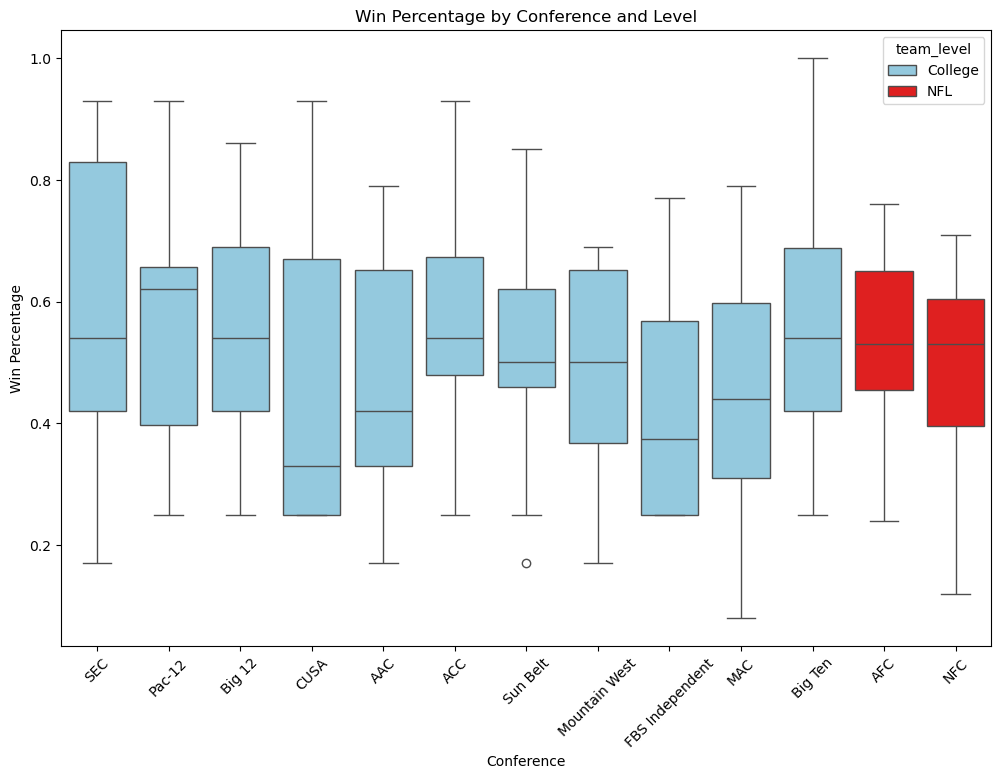

In [9]:
# conference grouping
plt.figure(figsize=(12, 8))
plt.title('Win Percentage by Conference and Level')
plt.xlabel('Conference')
plt.ylabel('Win Percentage')

sns.boxplot(x='conference', y='win_pct', data=cfb_nfl_df, hue='team_level', 
            palette={'NFL': 'red', 'College': 'skyblue'})

plt.xticks(rotation=45)

plt.savefig("win_pct_conf_level.png", dpi=300)
plt.show()

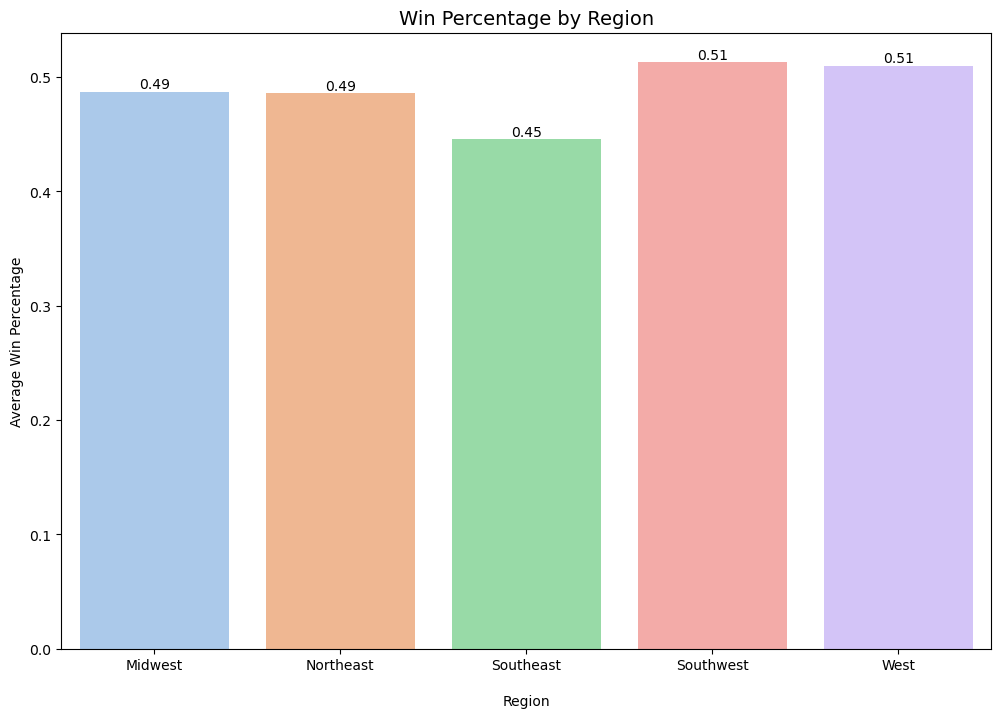

In [10]:
# region grouping, all levels
region_map = {
    'Northeast': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'MD'],
    'Midwest': ['OH', 'IN', 'IL', 'MI', 'WI', 'MO', 'ND', 'SD', 'NE', 'KS', 'IA', 'MN'],
    'West': ['MT', 'WY', 'CO', 'ID', 'UT', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI'],
    'Southeast': ['FL', 'GA', 'SC', 'AL', 'MS', 'LA', 'TN', 'KY', 'NC', 'VA'],
    'Southwest': ['TX', 'NM', 'AZ', 'OK']
}

# Function to assign region based on state
def get_region(state):
    for region, states in region_map.items():
        if state in states:
            return region

all_fb_df['region'] = all_fb_df['state'].apply(get_region)

# saving to csv for later use 
all_fb_df.to_csv('all_fb_region.csv')

region_win_pct = all_fb_df.groupby('region')['win_pct'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.title('Win Percentage by Region', fontsize=14)
plt.xlabel('\nRegion')
plt.ylabel('Average Win Percentage')

ax = sns.barplot(x='region', y='win_pct', data=region_win_pct, hue='region', palette='pastel')

# displaying win %
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

plt.savefig("win_pct_region.png", dpi=300)
plt.show()

### Question 3: Run vs. Pass by Level of Football, Geographic Regions

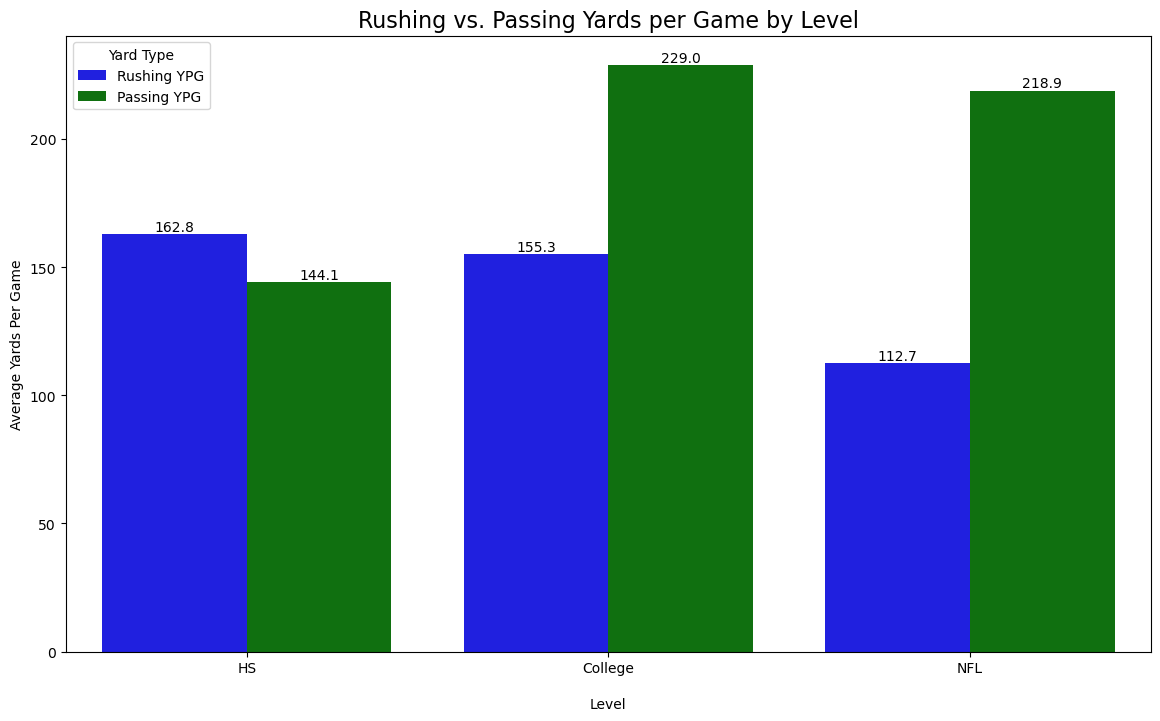

In [12]:
# Group data by region and team level, calculate average rushing and passing yards per game
run_pass_ypg_df = all_fb_df.groupby('team_level').agg({
    'rush_ypg': 'mean',
    'pass_ypg': 'mean'
}).reset_index()


run_pass_ypg_level_melted = run_pass_ypg_df.melt(
    id_vars=['team_level'], 
    value_vars=['rush_ypg', 'pass_ypg'], 
    var_name='Yard Type', 
    value_name='Yards Per Game'
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='team_level', 
    y='Yards Per Game', 
    hue='Yard Type', 
    data=run_pass_ypg_level_melted,
    order=['HS', 'College', 'NFL'],
    palette={'rush_ypg': 'blue', 'pass_ypg': 'green'},
    errorbar = None
)

# Add text labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

# Add titles and labels
plt.title('Rushing vs. Passing Yards per Game by Level', fontsize=16)
plt.xlabel('\nLevel')
plt.ylabel('Average Yards Per Game')
plt.legend(title='Yard Type', labels=['Rushing YPG', 'Passing YPG'])

plt.savefig("rush_pass_level.png", dpi=300)
plt.show()

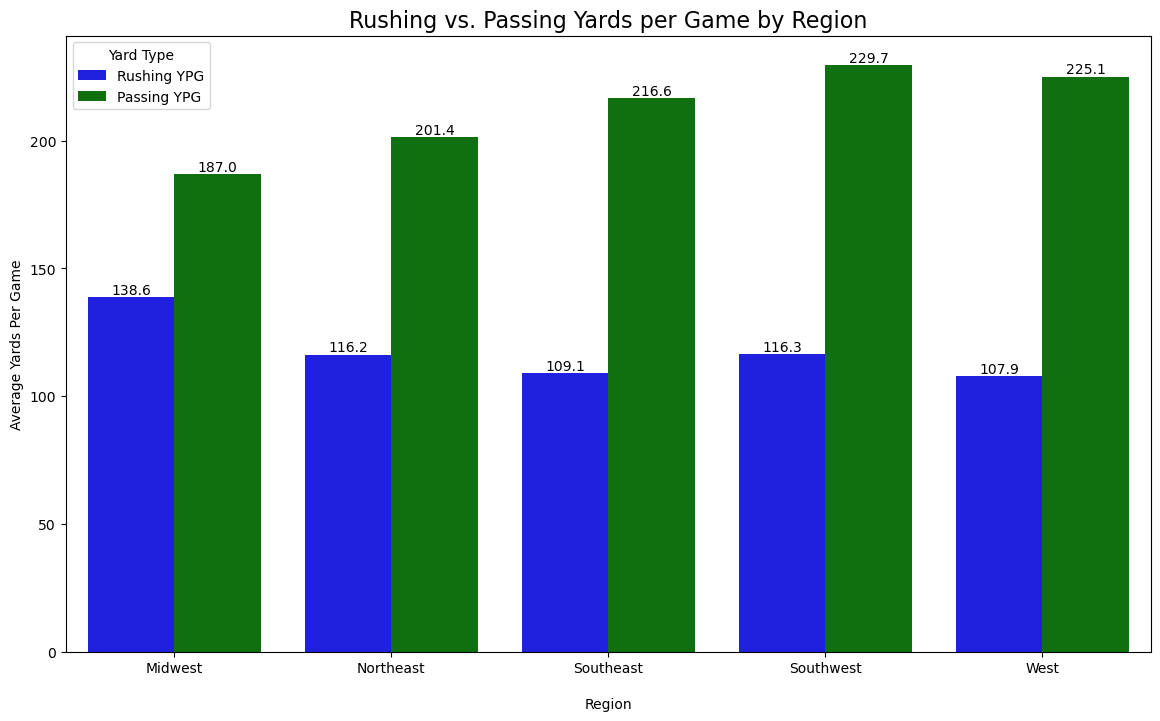

In [13]:
# Group data by region and team level, calculate average rushing and passing yards per game
run_pass_ypg_df = all_fb_df.groupby(['region', 'team_level']).agg({
    'rush_ypg': 'mean',
    'pass_ypg': 'mean'
}).reset_index()


run_pass_ypg_melted = run_pass_ypg_df.melt(
    id_vars=['region', 'team_level'], 
    value_vars=['rush_ypg', 'pass_ypg'], 
    var_name='Yard Type', 
    value_name='Yards Per Game'
)

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='region', 
    y='Yards Per Game', 
    hue='Yard Type', 
    data=run_pass_ypg_melted, 
    palette={'rush_ypg': 'blue', 'pass_ypg': 'green'},
    errorbar = None
)

# Add text labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

# Add titles and labels
plt.title('Rushing vs. Passing Yards per Game by Region', fontsize=16)
plt.xlabel('\nRegion')
plt.ylabel('Average Yards Per Game')
plt.legend(title='Yard Type', labels=['Rushing YPG', 'Passing YPG'])

plt.savefig("rush_pass_region.png", dpi=300)
plt.show()

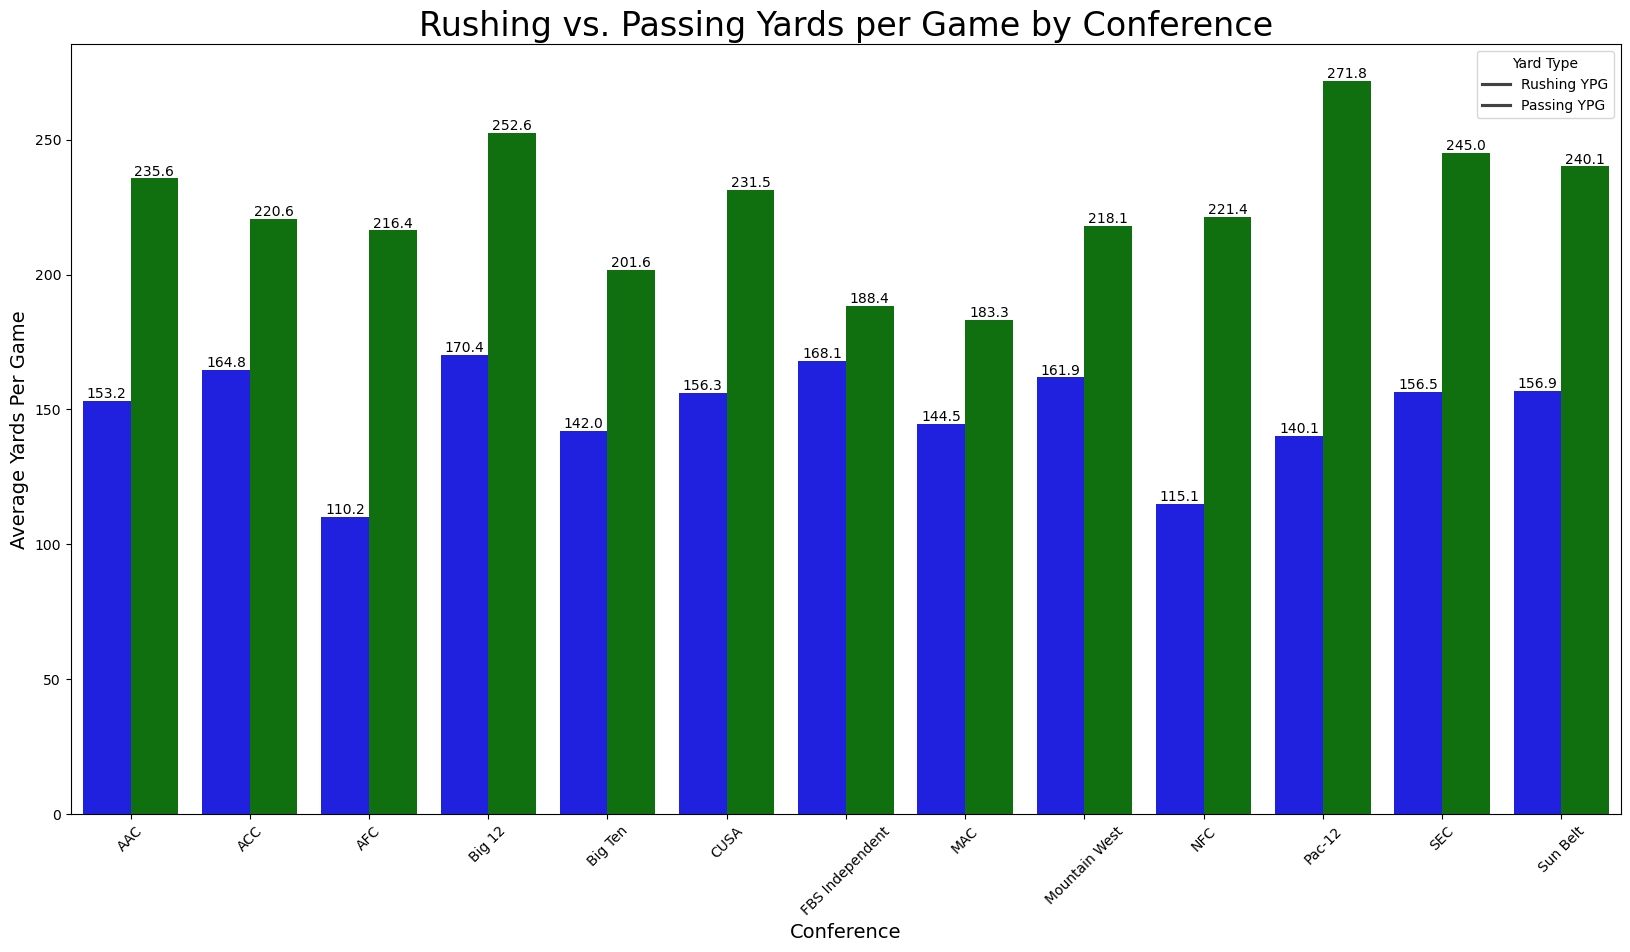

In [14]:
# Group by conference, calculate average rushing and passing yards per game
cfb_nfl_grouped = cfb_nfl_df.groupby('conference').agg({
    'rush_ypg': 'mean',
    'pass_ypg': 'mean'
}).reset_index()

# Melt the DataFrame for easier plotting
cfb_nfl_melted = cfb_nfl_grouped.melt(
    id_vars='conference', 
    value_vars=['rush_ypg', 'pass_ypg'], 
    var_name='Yard Type', 
    value_name='Yards Per Game'
)

# Create the bar plot for conferences
plt.figure(figsize=(20, 10))
ax = sns.barplot(
    x='conference', 
    y='Yards Per Game', 
    hue='Yard Type', 
    data=cfb_nfl_melted, 
    palette={'rush_ypg': 'blue', 'pass_ypg': 'green'}
)

# Add text labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

# Add titles and labels
plt.title('Rushing vs. Passing Yards per Game by Conference', fontsize=24)
plt.xlabel('Conference', fontsize=14)
plt.ylabel('Average Yards Per Game', fontsize=14)
plt.legend(title='Yard Type', labels=['Rushing YPG', 'Passing YPG'])
plt.xticks(rotation=45)

plt.savefig("rush_pass_conf.png", dpi=300)
plt.show()